In [11]:
!pip install jupyter pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions=pd.read_csv("Transactions.csv")





In [55]:
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [56]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [57]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [58]:
customers.fillna("Unknown", inplace=True)


In [59]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [60]:
merged_data = transactions.merge(customers, on="CustomerID", how="left")\
                          .merge(products, on="ProductID", how="left")


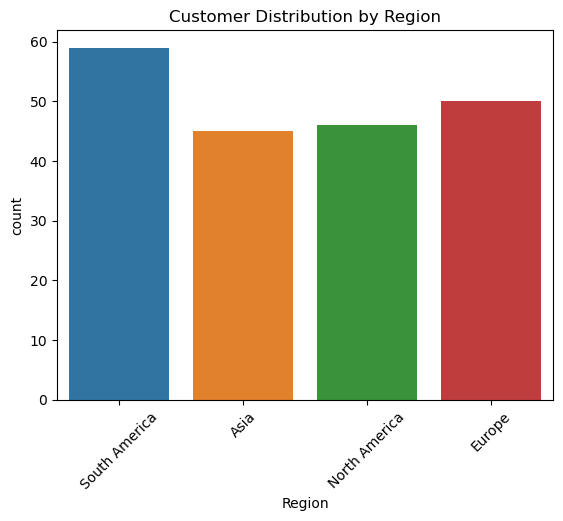

In [61]:
sns.countplot(data=customers, x="Region")
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()


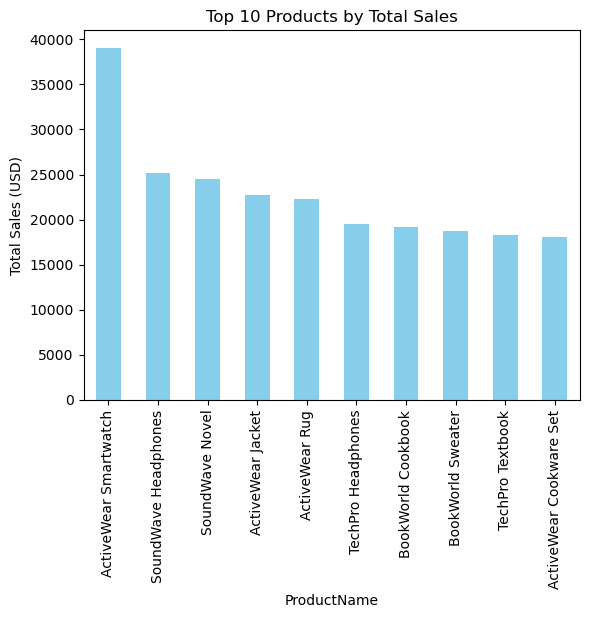

In [62]:
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", title="Top 10 Products by Total Sales", color='skyblue')
plt.ylabel("Total Sales (USD)")
plt.show()


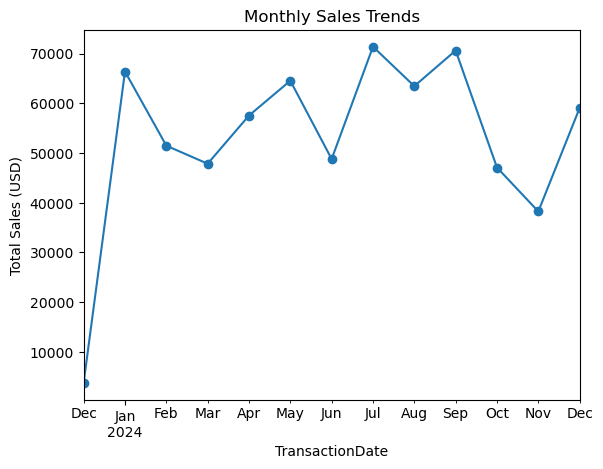

In [63]:
monthly_sales = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
monthly_sales.plot(kind="line", title="Monthly Sales Trends", marker='o')
plt.ylabel("Total Sales (USD)")
plt.show()


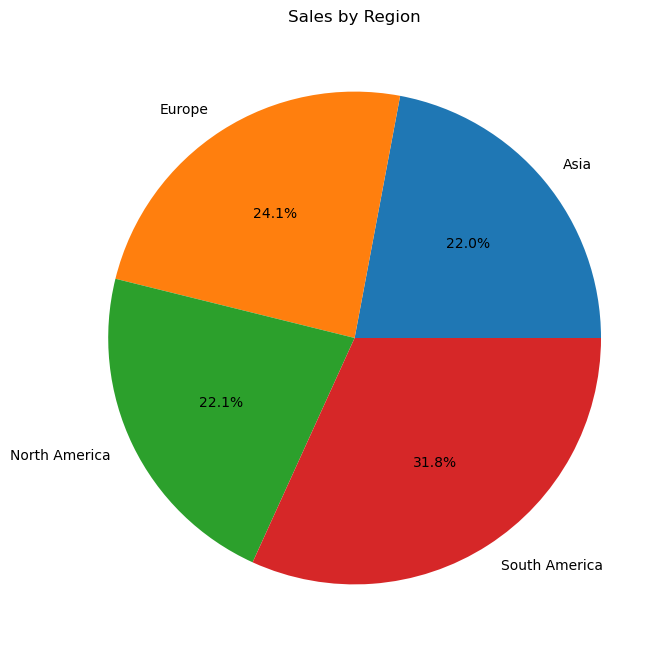

In [64]:
sales_by_region = merged_data.groupby("Region")["TotalValue"].sum()
sales_by_region.plot(kind="pie", title="Sales by Region", autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel("")
plt.show()


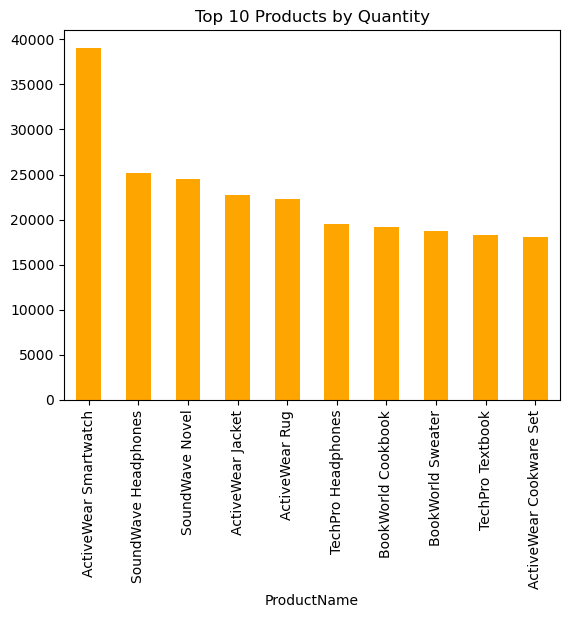

In [68]:
top_products.plot(kind='bar', title='Top 10 Products by Quantity', color='orange')
plt.show()


In [76]:
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)


In [77]:
total_quantity = product_sales.sum()
print(f"Total Quantity Sold: {total_quantity}")


Total Quantity Sold: 2537


In [78]:
top_10_quantity = product_sales.head(10).sum()
print(f"Top 10 Products' Quantity: {top_10_quantity}")


Top 10 Products' Quantity: 774


In [79]:
top_10_percentage = (top_10_quantity / total_quantity) * 100
print(f"The top 10 products account for {top_10_percentage:.2f}% of the total units sold.")


The top 10 products account for 30.51% of the total units sold.


In [80]:
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)


In [81]:
top_10_percent_count = int(len(customer_revenue) * 0.1)  # Top 10% of total customers


In [82]:
top_10_revenue = customer_revenue.head(top_10_percent_count).sum()


In [85]:
total_revenue = customer_revenue.sum()
top_10_percentage = (top_10_revenue / total_revenue) * 100
print(f"The top 10% of customers contribute {top_10_percentage:.2f}% of the total revenue.")



The top 10% of customers contribute 19.11% of the total revenue.


In [86]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [87]:
top_category = category_revenue.idxmax()
top_category_revenue = category_revenue.max()
print(f"The top category is {top_category} with a total revenue of ${top_category_revenue:.2f}.")


The top category is Books with a total revenue of $192147.47.


In [88]:
second_category = category_revenue.index[1]
second_category_revenue = category_revenue.iloc[1]
print(f"The second category is {second_category} with a total revenue of ${second_category_revenue:.2f}.")


The second category is Electronics with a total revenue of $180783.50.


In [89]:
low_categories = category_revenue.tail(3)  # Adjust the number as needed
print(f"The low-performing categories are:\n{low_categories}")


The low-performing categories are:
Category
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [90]:
total_revenue = category_revenue.sum()
category_revenue_percentage = (category_revenue / total_revenue) * 100
print(category_revenue_percentage)


Category
Books          27.847639
Electronics    26.200676
Clothing       24.082859
Home Decor     21.868826
Name: TotalValue, dtype: float64


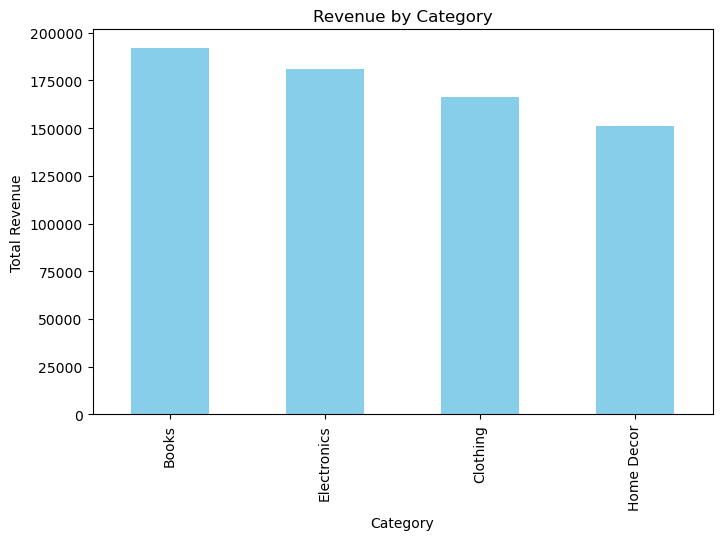

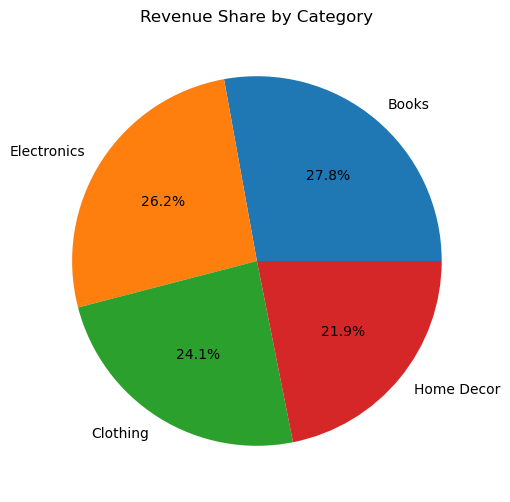

In [91]:
import matplotlib.pyplot as plt

# Bar Plot
category_revenue.plot(kind='bar', title='Revenue by Category', color='skyblue', figsize=(8, 5))
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

# Pie Chart
category_revenue_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Revenue Share by Category')
plt.ylabel('')
plt.show()
